# STAT 481 Hierarchy and Density Clustering
# Ali Sameer Ali Alzenji 202107857
# Ebrahim Juma Alsawan 202009241

### import libraries

In [2]:
### import libraries for hierarchical cluster tree, plotting dendrograms ,and clustering algorithm
import numpy as np
from scipy.cluster.hierarchy import linkage 
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

### Task 1: Create two random list

In [4]:
### A seed was created so the data would remain the same even when the code is ran again
np.random.seed(481)

### Two random list consisting of 10 data points were created with values from 0 to 20 
x = np.random.randint(0,20,size = 10)
y = np.random.randint(0,20,size = 10)
print(x , ' ' , y)

[14 11  1  6 11 10 18  8  9 10]   [14 16  3 14 11  6 10 19 18 17]


### Task 2: Turn data into points

In [6]:
### The created data were merged to form points
points = list(zip(x,y))
points

[(14, 14),
 (11, 16),
 (1, 3),
 (6, 14),
 (11, 11),
 (10, 6),
 (18, 10),
 (8, 19),
 (9, 18),
 (10, 17)]

### Task 3: Pass the data into linkage function

In [8]:
### Linkage function was used with points obtained and three different methods were used 
### First method is sigle link(MIN)
sigle_link = linkage(points, method='single', metric='euclidean')

### Second method is complete link(MAX)
complete_link = linkage(points, method='complete', metric='euclidean')

### Third method is group average
group_average = linkage(points, method='average', metric='euclidean')

### Task 4: Plot the dendrograms

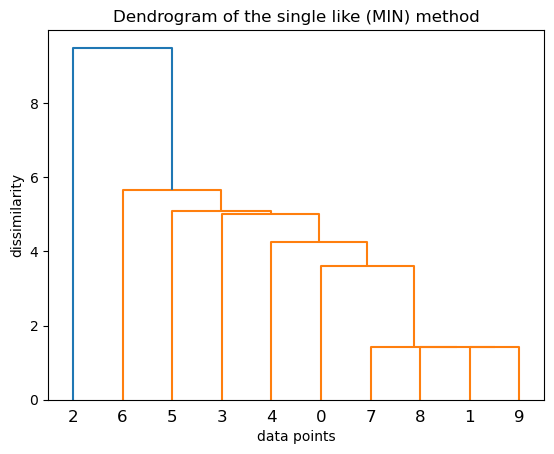

In [10]:
### plotting the dendrogram of the single link method
hierarchy.dendrogram(sigle_link)
plt.xlabel('data points')
plt.ylabel('dissimilarity')
plt.title('Dendrogram of the single like (MIN) method')
plt.show()

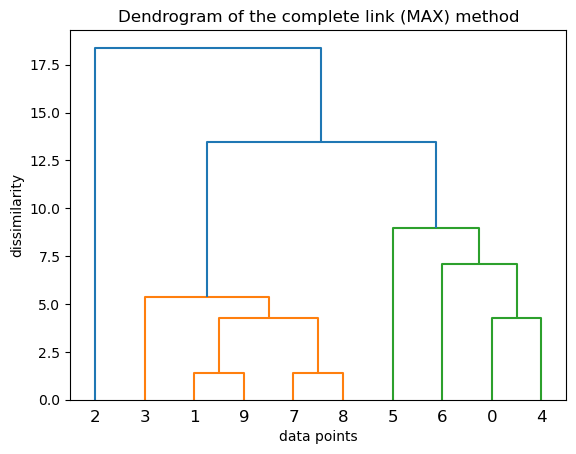

In [11]:
### plotting the dendrogram of the complete link method
hierarchy.dendrogram(complete_link)
plt.xlabel('data points')
plt.ylabel('dissimilarity')
plt.title('Dendrogram of the complete link (MAX) method')
plt.show()

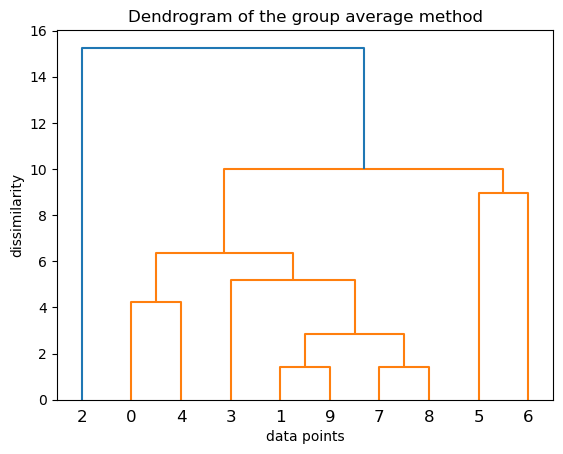

In [12]:
### plotting the dendrogram of the group average method
hierarchy.dendrogram(group_average)
plt.xlabel('data points')
plt.ylabel('dissimilarity')
plt.title('Dendrogram of the group average method')
plt.show()

### Task 5: Visualize the outcome of using 3 clusters and  the euclidean distance and Ward linkage

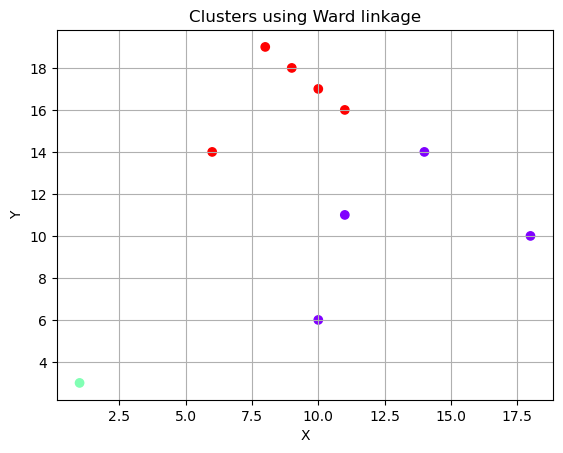

In [14]:
### Create the clustering model
cluster_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

### Fit and predict cluster labels
cluster_labels = cluster_model.fit_predict(points)

### Visualize the outcome
plt.scatter(*zip(*points), c=cluster_labels, cmap='rainbow')
plt.title('Clusters using Ward linkage')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### Bonus: comparison of the clusters across all linkage methods 

In [16]:
#Explanation of Results
#Single Link may result in chaining effect — long clusters
#Complete Link tends to form compact clusters
#Ward Linkage minimizes variance — often balanced clusters
#Group average is a compromise between single and complete


### Bonus: creative visualizations - a heat map

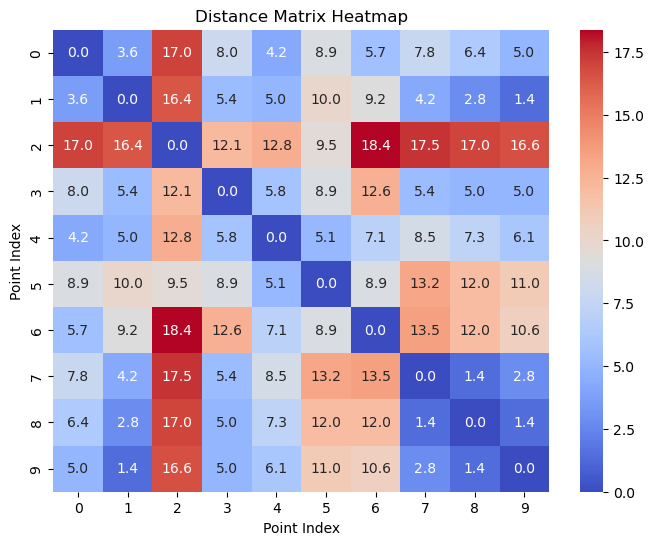

In [25]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Compute and plot the distance matrix
dist_matrix = squareform(pdist(points, metric='euclidean'))
plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Distance Matrix Heatmap")
plt.xlabel("Point Index")
plt.ylabel("Point Index")
plt.show()


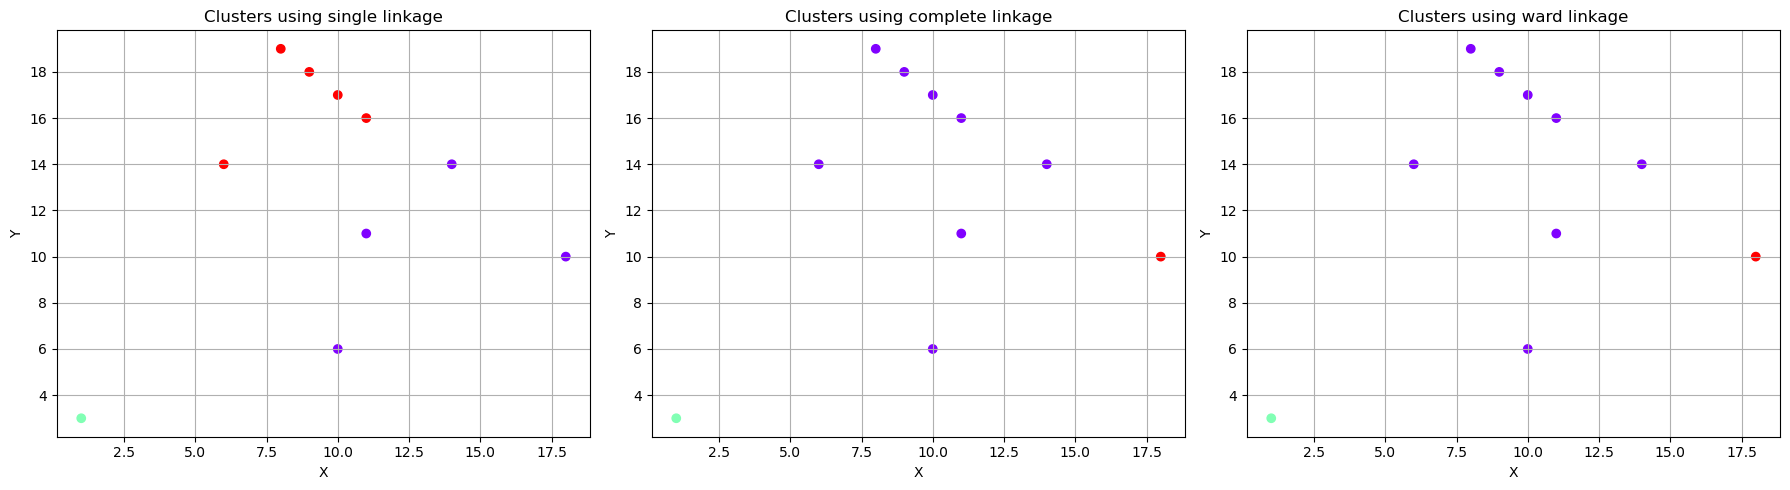

In [33]:
# Create 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))    



cluster_model1 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_model2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
cluster_model3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

cluster_labels1 = cluster_model1.fit_predict(points)
cluster_labels2 = cluster_model2.fit_predict(points)
cluster_labels3 = cluster_model2.fit_predict(points)

axs[0].scatter(*zip(*points), c=cluster_labels1, cmap='rainbow')
axs[0].set_title('Clusters using single linkage')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)

axs[1].scatter(*zip(*points), c=cluster_labels2, cmap='rainbow')
axs[1].set_title('Clusters using complete linkage')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid(True)

axs[2].scatter(*zip(*points), c=cluster_labels3, cmap='rainbow')
axs[2].set_title('Clusters using ward linkage')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
axs[2].grid(True)

plt.tight_layout()
plt.show()
